# Oscilador armónico unidimesional con el Método de Monte Carlo

## Modelo

Consideramos un oscilador armónico de una dimensión con un espectro de energía dado por:

$E_n = \hbar \omega (n+1/2)$

Para su resolución se utilizará el proceso de Markov que considera que cada estado microscópico sólo depende del último estado y no de los visitados anteriormente. Adicionalmente, se tiene la Condición de Balance Detallado (CBR) descrita a continuación.

$W(q' \rightarrow q)P_{eq}(q')-W(q \rightarrow q')P_{eq}(q)=0$

A partir de esto, podemos utilizar el algoritmo de Metrópolis para aplicar el método de Monte Carlo a nuestro sistema. 

## Aplicación

Definimos librerías a utilizar

In [1]:
#######################################################
import numpy as np                  # Libreria numpy ##
from numba import jit, njit, prange # Libreria numba ##
from math import exp                # importar exp ####
#######################################################

definición de la función que moverá nuestro estado adelante o atrás $n \rightarrow n' = \pm 1$ con probabilidad uniforme.

In [2]:
@jit
def E(it, beta, n, hw, cont):
    En = hw*(n + 0.5) #energia inicial
    E = np.zeros(it)
    E2 = np.zeros(it)
    Eprom = np.zeros(it)
    E2prom = np.zeros(it)
    Eprom2 = np.zeros(it)
    Sigma = np.zeros(it)
    narr = np.zeros(it)
    for i in range (it):
        nprima = n + np.random.choice([-1,1]) #estado n'
    
        if nprima < 0:
            nprima = n
        else:
            nprima = nprima
        
        Enp = hw*(nprima + 0.5) #energia para estado n'
        DE = Enp - En #delta de energia
        if DE <= 0:
            n = nprima
            En = Enp

        elif DE > 0:
            zeta = np.random.random_sample() #numero random entre 0,1
            alfa = zeta - np.exp(-beta*DE)
            if alfa >= 0:
                n = n
            elif alfa < 0:
                n = nprima
                En = Enp
    
        E[i] = En                       #energia
        E2[i] = E[i]**2                 #energia cuadrado
        narr[i] = n                     #nivel
        Eprom [i] = np.mean(E[:i])   #energia promedio
        E2prom [i] = np.mean(E2[:i])   #energia cuadrado promedio
    
    Eprom2[:] = Eprom[:]**2         #energia promedio hasta cada MCS al cuadrado
    Sigma[:] = E2prom[:]-Eprom2[:]  #fluctuacion
    
    return Eprom, Sigma

Definición de la variables a utilizar y cálculo de la enegía promedio

In [20]:
hw = 1. 
k = 1.
T = .8 #Temperatura
beta = 1./(k*T)
n = 1. #estado inicial
it = 50000 #numero de iteraciones
cont = 0
Epromedio, Fluctuacion = E(it, beta, n, hw, cont) #array con las energias en cada monte carlo step

### Gráficos

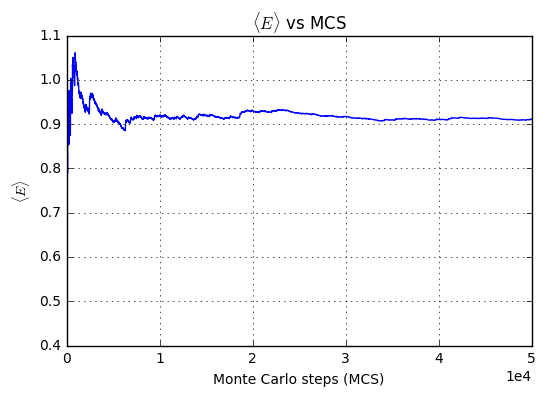

[ 0.91114822]


In [21]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(np.linspace(0,len(Epromedio[:]),len(Epromedio[:])), Epromedio[:])
plt.ylabel(r'$\langle E \rangle$')
plt.xlabel('Monte Carlo steps (MCS)')
plt.title(r'$\langle E \rangle$ vs MCS')
plt.grid(True)
plt.show()
print Epromedio[-1:]

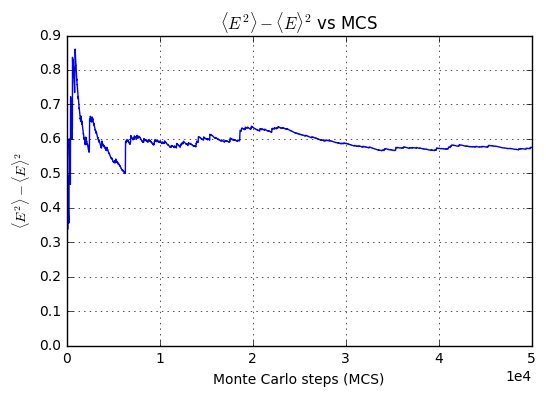

[ 0.57491202]


In [22]:
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(np.linspace(0,len(Fluctuacion[:]),len(Fluctuacion[:])), Fluctuacion[:])
plt.ylabel(r'$\langle E^2 \rangle - \langle E \rangle^2$')
plt.xlabel('Monte Carlo steps (MCS)')
plt.title(r'$\langle E^2 \rangle - \langle E \rangle^2$ vs MCS')
plt.grid(True)
plt.show()
print Fluctuacion[-1:]

## Dependencia de la temperatura

In [6]:
R = 10
Temp_max = 1
U_prev = np.zeros((R,it))
F = np.zeros((R,it))
b = np.zeros(R)
Cv_prev = np.zeros((R,it))
U = np.zeros(R)
Cv = np.zeros(R)
Temp = np.linspace(.1, Temp_max, R)
b[:] = 1./(k*Temp[:])
for i in range(R):
    U_prev[i][:], F[i][:] = E(it, b[i], n, hw, cont)
    Cv_prev[i][:] = F[i][:]/(Temp[i]**2)
    U[i] = np.mean(U_prev[i][int(3e4):])
    Cv[i] = np.mean(Cv_prev[i][int(3e4):])

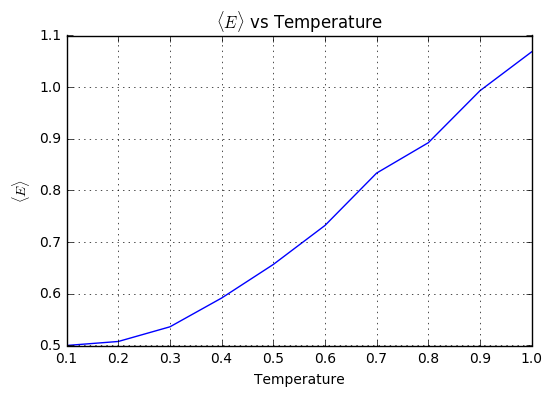

In [7]:
#plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.plot(Temp, U, c='blue')
plt.ylabel(r'$\langle E \rangle$')
plt.xlabel('Temperature')
plt.title(r'$\langle E \rangle$ vs Temperature')
plt.grid(True)
plt.show()

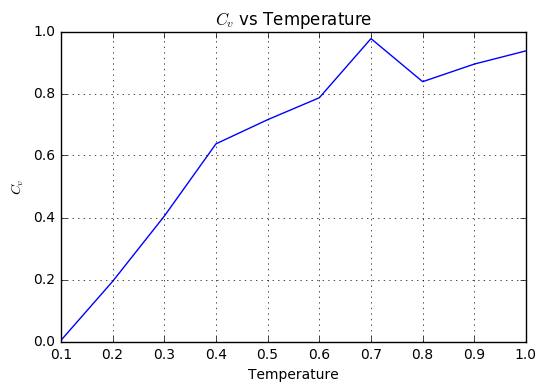

In [8]:
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(Temp, Cv, c='blue')
plt.ylabel(r'$C_v$')
plt.xlabel('Temperature')
plt.title(r'$C_v$ vs Temperature')
plt.grid(True)
plt.show()

## Promedio de la dependencia de la temperatura

In [9]:
Iteraciones = 20
R = 10
Temp_max = 1
U_prev = np.zeros((R,it))
F = np.zeros((R,it))
b = np.zeros(R)
Cv_prev = np.zeros((R,it))
U = np.zeros(R)
Cv = np.zeros(R)
Temp = np.linspace(.1, Temp_max, R)
b[:] = 1./(k*Temp[:])
Uprom = np.zeros((R,Iteraciones))
Cvprom = np.zeros((R,Iteraciones))
for j in range(Iteraciones):
    for i in range(R):
        U_prev[i][:], F[i][:] = E(it, b[i], n, hw, cont)
        Cv_prev[i][:] = F[i][:]/Temp[i]**2
        U[i] = np.mean(U_prev[i][int(3e4):])
        Cv[i] = np.mean(Cv_prev[i][int(3e4):])
        Uprom[i][j] = U[i]
        Cvprom[i][j] = Cv[i]

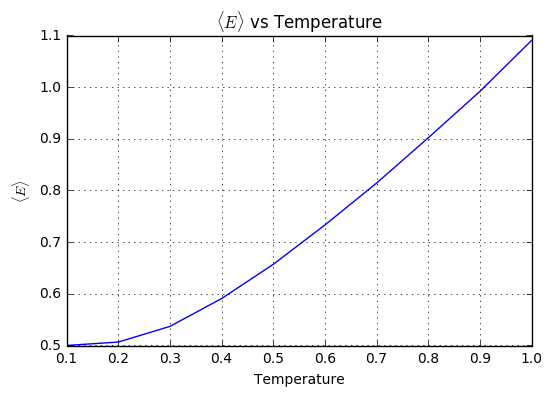

In [10]:
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
Upprom = np.zeros(R)
for i in range(R):
    Upprom[i] = np.mean(Uprom[i][:])
plt.plot(Temp, Upprom)
plt.ylabel(r'$\langle E \rangle$')
plt.xlabel('Temperature')
plt.title(r'$\langle E \rangle$ vs Temperature')
plt.grid(True)
plt.show()

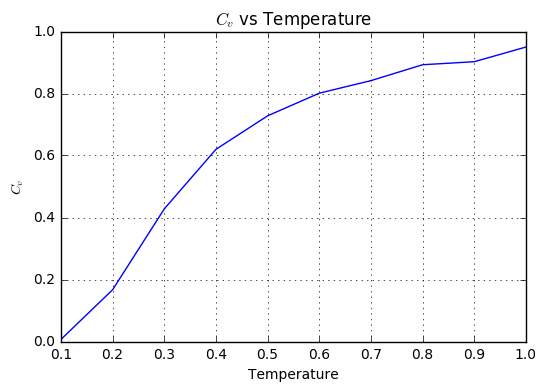

In [11]:
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
Cvpprom = np.zeros(R)
for i in range(R):
    Cvpprom[i] = np.mean(Cvprom[i][:])
plt.plot(Temp, Cvpprom)
plt.ylabel(r'$C_v$')
plt.xlabel('Temperature')
plt.title(r'$C_v$ vs Temperature')
plt.grid(True)
plt.show()

## Comparación con valor "exacto"

Ahora compararemos nuestro resultado con el valor exacto dado por el ensemble canónico

$\langle\epsilon\rangle = \hbar\omega \left(\frac{1}{e^{\frac{\hbar\omega}{kT}}-1} + \frac{1}{2} \right)$

In [12]:
e = hw*((1/(exp(hw*beta)-1))+0.5)
print 'El valor exacto es =', e

El valor exacto es = 1.08197670687


Podemos calcular además,

$\langle E^2 \rangle - \langle E \rangle^2 = kT^2 C_v$

$\frac{C_v}{N} = k \left( \frac{\hbar \omega}{kT} \right)^2 \frac{e^{\hbar\omega/kT}}{\left( e^{\beta\hbar\omega} -1 \right)^2}$

In [13]:
Cv = k*(hw*beta)**2 *exp(hw*beta)/((exp(hw*beta)-1)**2)
DeltaE = Cv*k*T**2
print r'El valor exacto de $C_v$ es =', Cv
print r'El valor exacto de $\DeltaE$ es =', DeltaE

El valor exacto de $C_v$ es = 0.920673594208
El valor exacto de $\DeltaE$ es = 0.920673594208


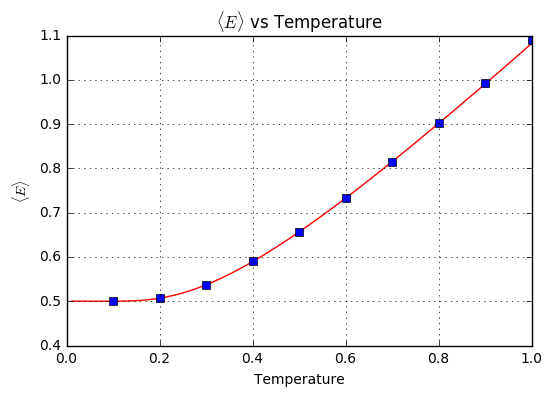

In [14]:
Rex = 1
bex = np.zeros(50)
Tempex = np.linspace(.01, Rex)
bex[:] = 1./(k*Tempex[:])
en = np.zeros(50)
en[:] = hw*((1/(np.exp(hw*bex[:])-1))+0.5)
plt.plot(Tempex, en, c='red')
plt.plot(Temp, Upprom, marker = 's', ls='None', c='blue')
plt.ylabel(r'$\langle E \rangle$')
plt.xlabel('Temperature')
plt.title(r'$\langle E \rangle$ vs Temperature')
plt.grid(True)
plt.show()

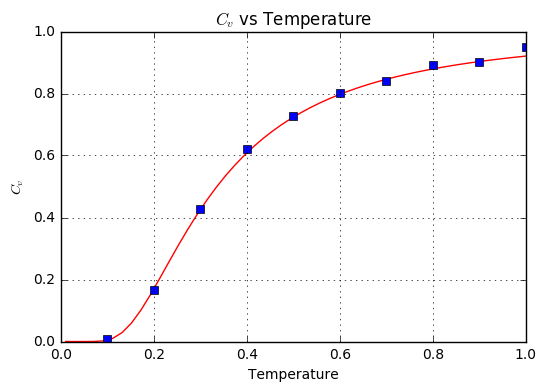

In [15]:
Cvex = np.zeros(50)
Cvex[:] = k*(hw*bex[:])**2 *np.exp(hw*bex[:])/((np.exp(hw*bex[:])-1)**2)
plt.plot(Tempex, Cvex, c='red')
plt.plot(Temp, Cvpprom, marker = 's', ls='None', c='blue')
plt.ylabel(r'$C_v$')
plt.xlabel('Temperature')
plt.title(r'$C_v$ vs Temperature')
plt.grid(True)
plt.show()

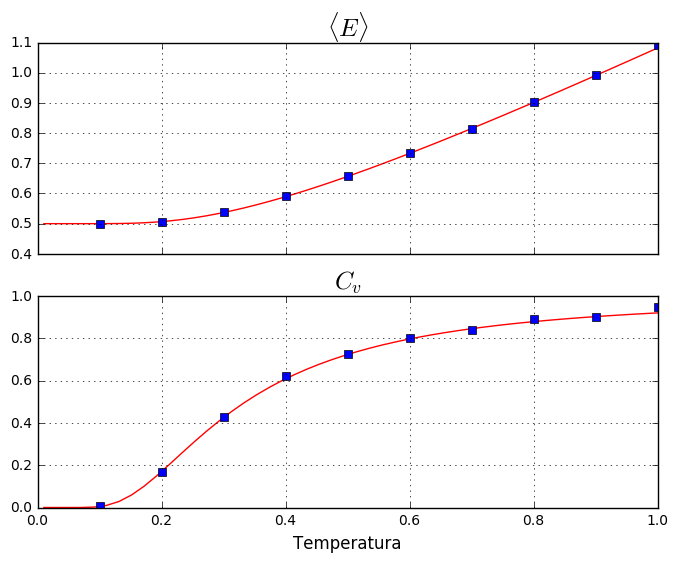

In [27]:
rcParams['figure.figsize'] = 8, 6
f, axarr = plt.subplots(2, sharex=True)

axarr[0].set_title(r'$\langle E \rangle$', fontsize=18)
axarr[0].plot(Tempex, en, c='red')
axarr[0].plot(Temp, Upprom, marker = 's', ls='None', c='blue')
axarr[0].grid()

axarr[1].set_title(r'$C_v$', fontsize=18)
axarr[1].plot(Tempex, Cvex, c='red')
axarr[1].plot(Temp, Cvpprom, marker = 's', ls='None', c='blue')
axarr[1].grid()

plt.xlabel('Temperatura', fontsize=12)
plt.show()